In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa

In [2]:
audio_filepath = "../../data/music_audio/genres_original/blues/blues.00001.wav"

In [3]:
import IPython.display as ipd

ipd.Audio(audio_filepath)

## Librosa Library

In [5]:
y, sample_rate = librosa.load(audio_filepath)

In [6]:
print("waveform data: ", y)
print("sample_rate: ", sample_rate)

waveform data:  [ 0.00341797  0.00430298  0.00137329 ... -0.11953735 -0.17495728
 -0.15118408]
sample_rate:  22050


### Visualise the waveform data

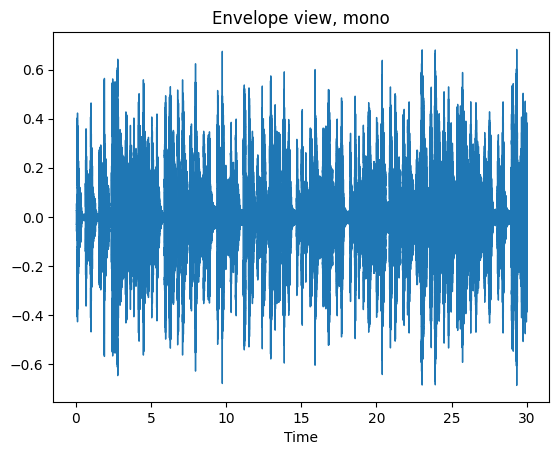

In [7]:
import librosa.display

fig, ax = plt.subplots(nrows=1, sharex=True)
librosa.display.waveshow(y, sr=sample_rate)
ax.set(title='Envelope view, mono')
ax.label_outer()

### get the beats data from the librosa library

In [8]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sample_rate)
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

Estimated tempo: 68.00 beats per minute


In [9]:
##time for each beat
beat_times = librosa.frames_to_time(beat_frames, sr=sample_rate)
beat_times

array([ 0.06965986,  0.95201814,  1.85759637,  2.73995465,  3.62231293,
        4.5046712 ,  5.36380952,  6.19972789,  7.05886621,  7.94122449,
        8.82358277,  9.65950113, 10.61151927, 11.49387755, 12.37623583,
       13.23537415, 14.14095238, 15.0000907 , 15.90566893, 16.78802721,
       17.67038549, 18.57596372, 19.43510204, 20.29424036, 21.22303855,
       22.08217687, 22.9877551 , 23.87011338, 24.63637188, 25.40263039,
       26.26176871, 27.16734694, 28.04970522])

### Spectogram

A spectrogram displays the strength of the signal or loudness(in decibels) over a period of time at different values of frequencies of the wave.

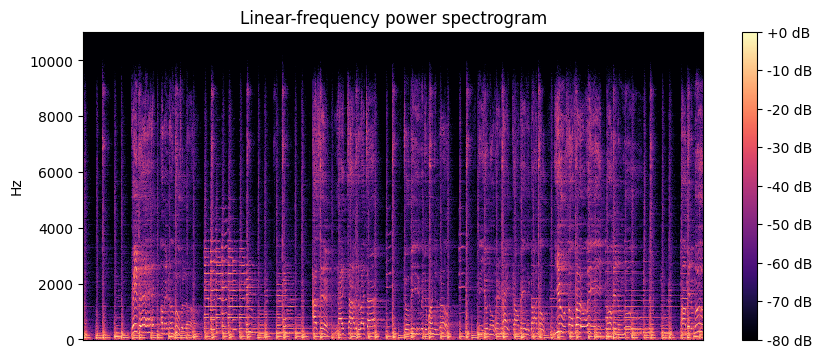

In [10]:
# Plot spectogram
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

# amplitude_to_db converts an amplitude spectrogram to dB-scaled spectrogram
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.show()

### Get the MFCC features

MFCC acts as a Music Information Retreival method. The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope.

In [11]:
def mfcc_features(signal,sample_rate):
    return np.mean(librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=20).T,axis=0).tolist()
mfcc_features(y,sample_rate)

[-207.52383422851562,
 123.98513793945312,
 8.94701862335205,
 35.867149353027344,
 2.909594774246216,
 21.519472122192383,
 -8.556512832641602,
 23.370676040649414,
 -10.103608131408691,
 11.899242401123047,
 -5.558824062347412,
 5.377876281738281,
 -2.2344918251037598,
 4.220704078674316,
 -6.01068639755249,
 0.9292942881584167,
 -0.728402853012085,
 0.29687243700027466,
 -0.2824304401874542,
 0.5306444764137268]